# **NOTES**

## **Intro to Databases**
---

### **Quick Intro**
SQLModel covered SQL Databases.<br>
**It doesn't include NOSQL DB.**<br>
Databases are useful you need dynamic data accessible at any time.<br>
The data may come from outside the program and ends outside the program.<br>
It includes actions as create, store, read, update, add, remove or delete.
It is more efficient to use a SQL DB as it easier to access to a fraction of the data for many operations as updating some values.
Operations on writing files as overwrite or append are not equally flexible and are code relient.<br>


### **Exemple of a single server application with database located outside the machine running your code :**
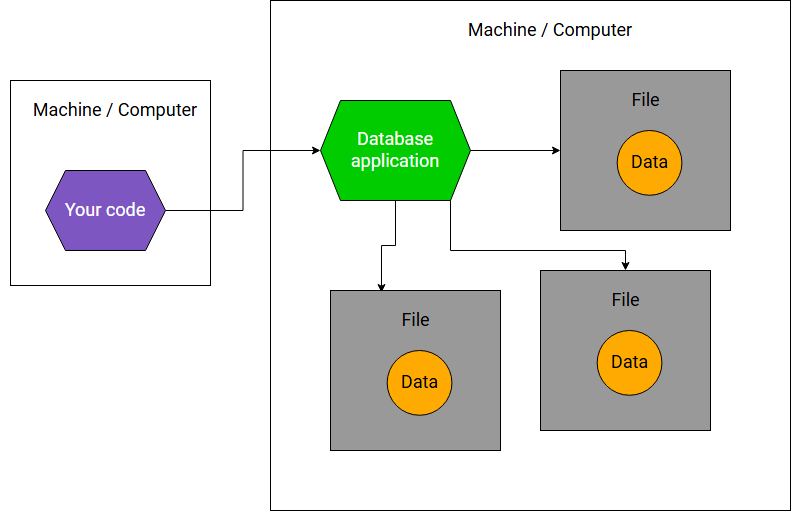

This way, your code doesn't read or modify the files containing the database (e.g. **.db** files)
The database application is the one modifying the code.<br>


### **Exemple of distributed server applications running databases files :**
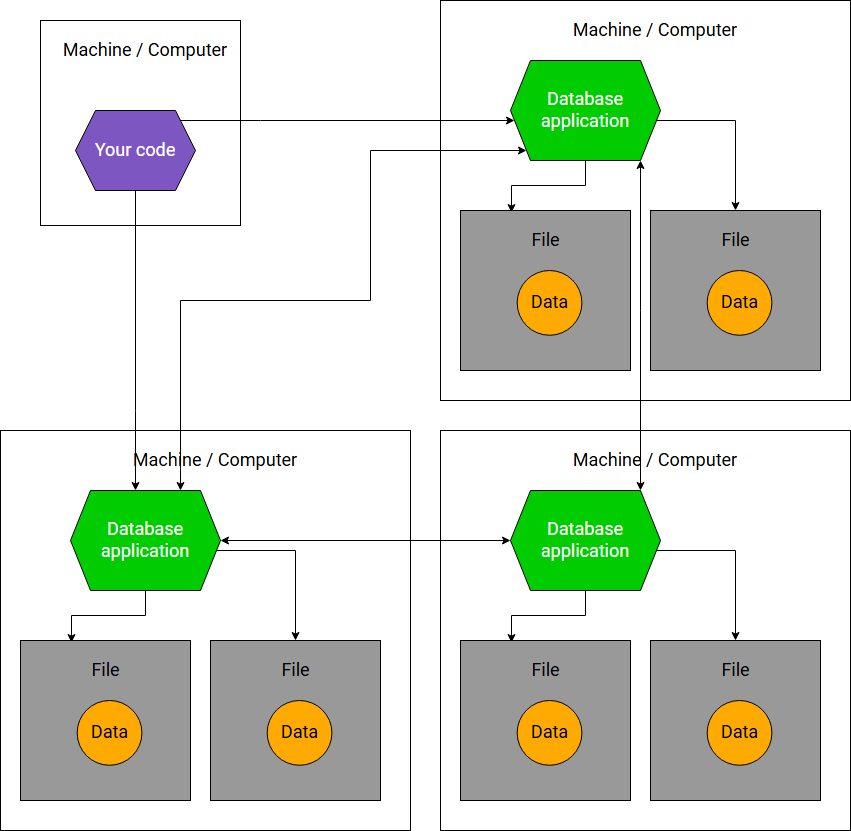

### **Identifications - KEYS**
To identify relations between tables in a database, you need keys.<br>
- Each table has a **primary key which is unique** (abbreviated as id)
- **Foreign Keys** (abbreviated as FK or fk) are non unique keys which is linked to a **primary key** from a **foreign table** to explain the **relationship** between each row of the **primary table** and the **foreign table**.<br>
They are essentiel to perform **merge** between multiple tables coming **from a Relationnal Database (using multiple tables with relations)**.


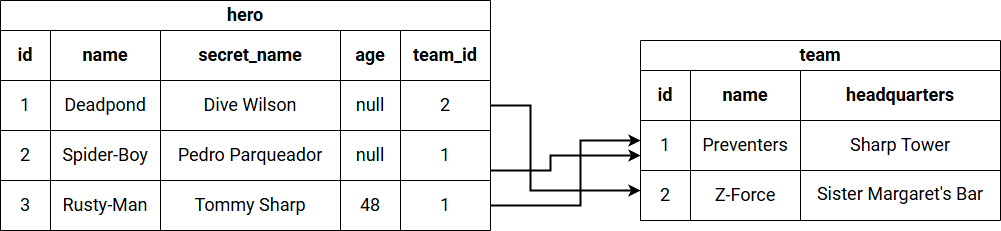

### **SQLModel main goal**
SQLModel is built on top of SQLAlchemy. It is, in fact, just SQLAlchemy and Pydantic mixed together with some sugar on top.<br>
SQLModel is a library that helps you write Python code with regular Python objects, and then it transfers that to SQL statements that it sends to a SQL Database.<br>
Next, it receives the data and puts it in Python objects that you can continue to use in your code.<br>
**SQLModel converts Python objects to SQL and back seamlessly.**

## **Object Relationnal Mapping (ORM)**
---
As stated before, **SQLModel converts Python objects to SQL and back seamlessly using ORM, a concept also known as Database to Code.**

### **Data sanitization : Prevention of SQL Injection**

It prevents SQL Injection, wrapping string objects into the statement avoiding SQL malicious statement.<br>
Look at this exemple:
>user_id = input("Type the user ID: ")<br>
><br>
>session.exec(<br>
>....select(Hero).where(Hero.id == user_id)<br>
>).all()

If the user is an attacker and tries to send this as the "ID":
>; DROP TABLE hero

Then the final statement produced by SQLModel will be:
>SELECT * FROM hero WHERE id = "2; DROP TABLE hero;";


### **Editor support with autocompletion, inline hints,etc...**

If your SQL statement is written into a string variable, you won't have autocompletion or inline hints.<br>
SQLModel can suggest field names as autocompletion & hints within your session execution.<br>

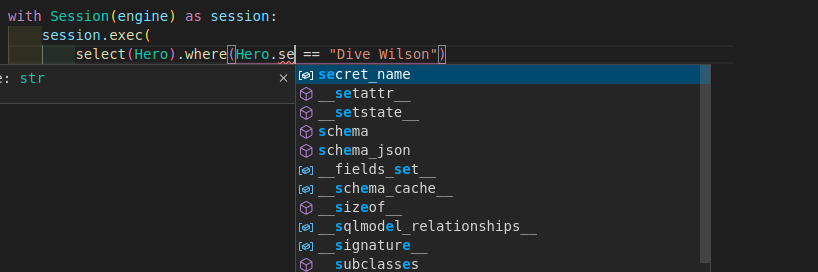


### **ORM and SQL**

An ORM is a library **that translates from SQL to code, and from code to SQL. All using classes and objects.**

#### **O stands for Object**

For example this class is part of that Object Oriented Programming:

```
class Hero(SQLModel):
    id: Optional[int] = Field(default=None, primary_key=True)
    name: str
    secret_name: str
    age: Optional[int] = None
```

#### **R stands for Relationnal**

For example this Relation or table:

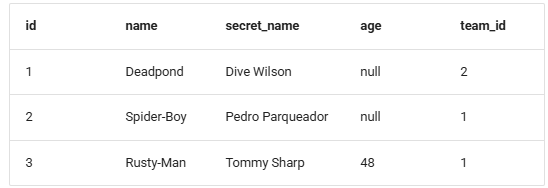

#### **M stands for Mapping**

This comes from Math, when there's something that can convert from some set of things to another, that's called a "mapping function". That's where the Mapper comes from.

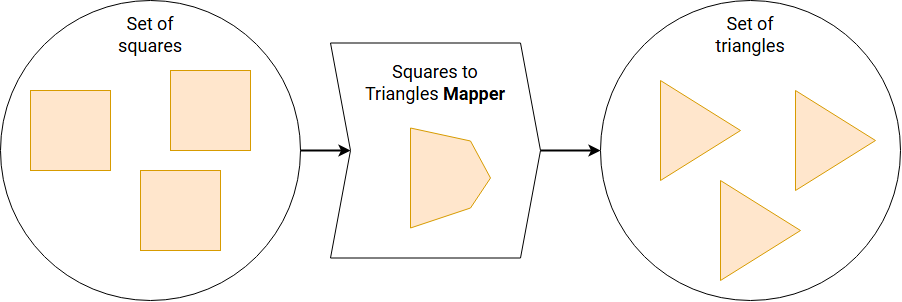

### **SQL Conventions**

Remember :
- name the tables in plural as `heroes` opposed as Python Class Name convention `Hero`


## **Env VARIABLES**
---

### **Concept**

These environment variables can only handle text strings, as they are external to Python and have to be compatible with other programs and the rest of the system (and even with different operating systems, as Linux, Windows, macOS).


That means that any value read in Python from an environment variable will be a str, and any conversion to a different type or any validation has to be done in code.

### **Create & Read**

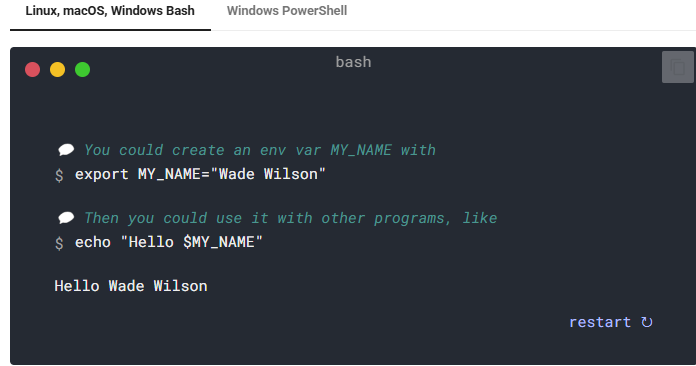

```
import os

name = os.getenv("MY_NAME", "World")
print(f"Hello {name} from Python")
```

### **Create for a specific program invocation**

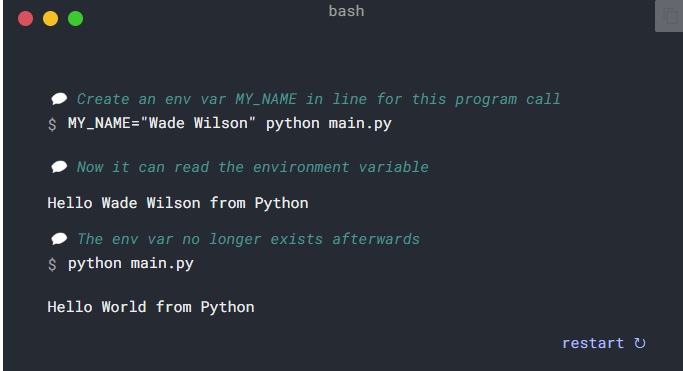

### **PATH env variable**

The value of the variable PATH is a long string that is made of directories separated by a colon : on Linux and macOS, and by a semicolon ; on Windows.

`/usr/local/bin:/usr/bin:/bin:/usr/sbin:/sbin`

This means that the system should look for programs in the directories:
- /usr/local/bin
- /usr/bin
- /bin
- /usr/sbin
- /sbin


### **Activating the virtual env affects PATH variable**

Activating a virtual environment adds its path .venv/bin (on Linux and macOS) or .venv\Scripts (on Windows) to the PATH environment variable.

An important detail is that it will put the virtual environment path at the beginning of the PATH variable. The system will find it before finding any other Python available. This way, when you run python, it will use the Python from the virtual environment instead of any other python (for example, a python from a global environment).

Activating a virtual environment also changes a couple of other things, but this is one of the most important things it does.

# **CODE**

## Engine

### Fonction create_engine

In [1]:
"""
Create the engine
"""

from sqlmodel import create_engine # noqa

db_filename = "database.db"
sqlite_url = f"sqlite:///{db_filename}"
# sqlite_url = "sqlite:///:memory:" to load the table directly in memory

engine = create_engine(url=sqlite_url, echo=True) # echo is optional and used for debugging and seeing SQL inputs

engine_nodebug = create_engine(url=sqlite_url, echo=False) # echo is optional and used for debugging and seeing SQL inputs

## Classe SQLModel

### How to Use

In [2]:
"""
Create a Table Model Class.
The Class represents the data in the table.
The Class will inherit from SQLModel Class.
Once the class is defined, you can't declare it again.
This class Hero represents the table for our heroes. And each instance we create later will represent a row in the table.
Si la classe est déjà dans la database, il est tout de même nécessaire de la relancer à chaque initialisation.
"""
from sqlalchemy.exc import InvalidRequestError # noqa
from sqlmodel import Field, SQLModel # noqa

# If class is already created and extend_existing is False, it will raise an error.
try:
    state = 1
    class Hero(SQLModel, table=True): # If table=True, the Class acts a Table Model. If False, it acts as a Data Model (explain later).
        # OPTIONNEL  : Modifie la config de la table.
        __table_args__ = {'extend_existing': False} # Default value

        # OBLIGATOIRE : Déclarer les attributs de classes dont l'équivalent en table 
        id: int | None = Field(default=None, primary_key=True) # Il est recommandé de mettre None en default_value d'où int | None. La table elle-même va générer la clé INT
        name: str # Use Python standard annotations
        secret_name: str # Not setting a default value here is interpreted by SQL as NOT NULL.
        age: int | None = None # Setting None as default value is interpreted by SQL as NULL. This field could be "NULL"

except InvalidRequestError as e:
    print(e)
    print("Removing the class from SQLModel.metadata.tables ...")
    SQLModel.metadata.remove(SQLModel.metadata.tables['hero']) # Drop the table internally
    print("Warning is OK and class has been removed from metadata.")
    state = 2

finally:
    print(f'Exécution n°{state}')
    print("Exécutez à nouveau la cellule pour enregistrer la classe" if state == 2 else "Classe créée avec succès.")

Exécution n°1
Classe créée avec succès.


In [ ]:
"""
L'alternative est d'utiliser extend_existing = True
"""

for i in range(5):
    print(f'Exécution n°{i}')
    class Hero(SQLModel, table=True):
        __table_args__ = {'extend_existing': True} # Be careful using True as you can add, modify fields, etc..

        # OBLIGATOIRE : Déclarer les attributs de classes dont l'équivalent en table 
        id: int | None = Field(default=None, primary_key=True) # Setting
        name: str # Use Python standard annotations
        secret_name: str # Not setting a default value here is interpreted by SQL as NOT NULL.
        age: int | None = None # Setting None as default value is interpreted by SQL as NULL. This field could be "NULL"

Exécution n°0
Exécution n°1
Exécution n°2
Exécution n°3
Exécution n°4


In [94]:
class SuperHero(SQLModel, table=True): 
        __table_args__ = {'extend_existing': True} # Default value

        # OBLIGATOIR
        id: int | None = Field(default=None, primary_key=True) 
        name: str 

print("Créé uniquement la table dans la database si elle est contenue dans la metadata")
SQLModel.metadata.create_all(bind=engine, tables=[SuperHero.__table__])
print("Enlève la table dans la database")
SQLModel.metadata.drop_all(bind=engine, tables=[SuperHero.__table__])
print("Enlève la classe SuperHero de la metadata")
SQLModel.metadata.remove(SQLModel.metadata.tables["SuperHero".lower()])


Créé uniquement la table dans la database si elle est contenue dans la metadata
2025-02-25 15:07:26,761 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2025-02-25 15:07:26,781 INFO sqlalchemy.engine.Engine PRAGMA main.table_info("superhero")
2025-02-25 15:07:26,790 INFO sqlalchemy.engine.Engine [raw sql] ()
2025-02-25 15:07:26,821 INFO sqlalchemy.engine.Engine COMMIT
Enlève la table dans la database
2025-02-25 15:07:26,847 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2025-02-25 15:07:26,860 INFO sqlalchemy.engine.Engine PRAGMA main.table_info("superhero")
2025-02-25 15:07:26,869 INFO sqlalchemy.engine.Engine [raw sql] ()
2025-02-25 15:07:26,915 INFO sqlalchemy.engine.Engine 
DROP TABLE superhero
2025-02-25 15:07:26,922 INFO sqlalchemy.engine.Engine [no key 0.00684s] ()


/home/hedredo/github/learning/.venv/lib/python3.10/site-packages/sqlmodel/main.py:638: SAWarning: This declarative base already contains a class with the same class name and module name as __main__.SuperHero, and will be replaced in the string-lookup table.
  DeclarativeMeta.__init__(cls, classname, bases, dict_, **kw)


2025-02-25 15:07:26,976 INFO sqlalchemy.engine.Engine COMMIT
Enlève la classe SuperHero de la metadata


In [95]:
# Add the table to database
print("Création de la table dans la database ...")
SQLModel.metadata.create_all(bind=engine_nodebug)

# Remove the table from database
SQLModel.metadata.drop_all(engine_nodebug, tables=[Hero.__table__])
print("Efface la table dans la database ...")

# Adding back every tables in metadata
print(f"Après effacement, on regarde si la metadata contient toujours les clés {SQLModel.metadata.tables.keys()}")
if len(SQLModel.metadata.tables) > 0:
    SQLModel.metadata.create_all(bind=engine_nodebug)
    print("Table recréée avec les tables dans dict_keys")

Création de la table dans la database ...
Efface la table dans la database ...
Après effacement, on regarde si la metadata contient toujours les clés dict_keys(['hero'])
Table recréée avec les tables dans dict_keys


In [3]:
from models import SuperHero  # You can have all your class and calls .

print("A l'import de la classe, la classe a été rajoutée dans le metadata et on peut la crééer de ce fait.")
SQLModel.metadata.create_all(bind=engine, tables=[SuperHero.__table__])

A l'import de la classe, la classe a été rajoutée dans le metadata et on peut la crééer de ce fait.
2025-02-26 17:55:59,811 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2025-02-26 17:55:59,813 INFO sqlalchemy.engine.Engine PRAGMA main.table_info("superhero")
2025-02-26 17:55:59,814 INFO sqlalchemy.engine.Engine [raw sql] ()
2025-02-26 17:55:59,818 INFO sqlalchemy.engine.Engine COMMIT


### Best practice : table creation

In [ ]:
from sqlmodel import Field, SQLModel, create_engine


class MinusHero(SQLModel, table=True):
    id: int | None = Field(default=None, primary_key=True)
    name: str
    secret_name: str
    age: int | None = None


sqlite_file_name = "database.db"
sqlite_url = f"sqlite:///{sqlite_file_name}"

engine = create_engine(sqlite_url, echo=True)


def create_db_and_tables():
    SQLModel.metadata.create_all(engine, tables=[MinusHero.__table__])


if __name__ == "__main__":
    create_db_and_tables()

2025-02-25 15:20:29,611 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2025-02-25 15:20:29,613 INFO sqlalchemy.engine.Engine PRAGMA main.table_info("minushero")
2025-02-25 15:20:29,615 INFO sqlalchemy.engine.Engine [raw sql] ()
2025-02-25 15:20:29,617 INFO sqlalchemy.engine.Engine PRAGMA temp.table_info("minushero")
2025-02-25 15:20:29,619 INFO sqlalchemy.engine.Engine [raw sql] ()
2025-02-25 15:20:29,623 INFO sqlalchemy.engine.Engine 
CREATE TABLE minushero (
	id INTEGER NOT NULL, 
	name VARCHAR NOT NULL, 
	secret_name VARCHAR NOT NULL, 
	age INTEGER, 
	PRIMARY KEY (id)
)


2025-02-25 15:20:29,624 INFO sqlalchemy.engine.Engine [no key 0.00111s] ()
2025-02-25 15:20:29,641 INFO sqlalchemy.engine.Engine COMMIT


### Field & Index

In [ ]:
"""
Les primary key sont des index par défaut, pour optimizer la recherche des query.
Il est toutefois posssible de définir des index autres que la PK
"""

class SuperHero(SQLModel, table=True): 
        __table_args__ = {'extend_existing': True} # Default value

        # OBLIGATOIR
        id: int | None = Field(default=None, primary_key=True) # is an default index
        name: str = Field(index=True) # not an index by default

## Session

### SQLAlchemy way

In [96]:
# Using SQLAlchemy
from sqlalchemy.orm import sessionmaker

# Crée une session pour se connecter et faire une requête SQL sans with
sql_session = sessionmaker(bind=engine)
session = sql_session()
new_hero = Hero(id = None, name = "Thor", secret_name="Thor", age="640342")
session.add(new_hero)
session.commit()
session.close()

2025-02-25 15:08:23,088 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2025-02-25 15:08:23,101 INFO sqlalchemy.engine.Engine INSERT INTO hero (name, secret_name, age) VALUES (?, ?, ?)
2025-02-25 15:08:23,103 INFO sqlalchemy.engine.Engine [cached since 836.3s ago] ('Thor', 'Thor', '640342')
2025-02-25 15:08:23,105 INFO sqlalchemy.engine.Engine COMMIT


### session.add et session.commit

In [ ]:
"""
De cette manière chaque session sera chargée en mémoire et déchargée dans la base.
"""

# Or the same with sqlmodel and a context manager
from sqlmodel import Session # noqa

with Session(bind=engine) as session:
    hero_1 = Hero(id=None, name="Albert Dupont", secret_name="RatLover")
    hero_2 = Hero(id=None, name="MindKiller", secret_name="John Doe", age=53)
    # Load the rows into memory
    session.add(hero_1)
    session.add(hero_2)
    # Push the rows in a single batch to the database
    session.commit()

2025-02-25 15:08:25,116 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2025-02-25 15:08:25,118 INFO sqlalchemy.engine.Engine INSERT INTO hero (name, secret_name, age) VALUES (?, ?, ?)
2025-02-25 15:08:25,119 INFO sqlalchemy.engine.Engine [cached since 838.3s ago] ('Albert Dupont', 'RatLover', None)
2025-02-25 15:08:25,122 INFO sqlalchemy.engine.Engine COMMIT


In [106]:
"""
When a class objet has been added then commited, it ex^pires
"""

# Code above omitted 👆
hero_1 = Hero(id=None, name="BloodThirster", secret_name="Daniel Monjoux")
hero_2 = Hero(id=None, name="OneLeg", secret_name="OneLeg", age=25)

with Session(engine) as session:
    session.add(hero_1)
    session.add(hero_2)

    print("After adding to the session")
    print("Hero 1:", hero_1)
    print("Hero 2:", hero_2)

    session.commit()

    print("After committing the session")
    print("Hero 1:", hero_1)
    print("Hero 2:", hero_2)

    print("After committing, show ids")
    print("Hero 1:", hero_1.id)
    print("Hero 2:", hero_2.id)


After adding to the session
Hero 1: id=None name='BloodThirster' secret_name='Daniel Monjoux' age=None
Hero 2: id=None name='OneLeg' secret_name='OneLeg' age=25
2025-02-25 15:45:30,024 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2025-02-25 15:45:30,029 INFO sqlalchemy.engine.Engine INSERT INTO hero (name, secret_name, age) VALUES (?, ?, ?) RETURNING id
2025-02-25 15:45:30,031 INFO sqlalchemy.engine.Engine [cached since 309.4s ago (insertmanyvalues) 1/2 (ordered; batch not supported)] ('BloodThirster', 'Daniel Monjoux', None)
2025-02-25 15:45:30,034 INFO sqlalchemy.engine.Engine INSERT INTO hero (name, secret_name, age) VALUES (?, ?, ?) RETURNING id
2025-02-25 15:45:30,040 INFO sqlalchemy.engine.Engine [insertmanyvalues 2/2 (ordered; batch not supported)] ('OneLeg', 'OneLeg', 25)
2025-02-25 15:45:30,061 INFO sqlalchemy.engine.Engine COMMIT
After committing the session
Hero 1: 
Hero 2: 
After committing, show ids
2025-02-25 15:45:30,081 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2

### Automatic refresh with fetch (accessing attributes)

In [ ]:
"""
While accessing attributes after expiration, session refreshs under the hood the objects!
"""

# Code above omitted 👆
hero_1 = Hero(id=None, name="MegaKiller", secret_name="John Steer")
hero_2 = Hero(id=None, name="ChuckNorris", secret_name="ChuckNorris", age=-1)

with Session(engine) as session:
    session.add(hero_1)
    session.add(hero_2)

    print("After adding to the session")
    print("Hero 1:", hero_1)
    print("Hero 2:", hero_2)

    session.commit()

    print("After committing the sessionn the objects expired")
    print("Hero 1:", hero_1)
    print("Hero 2:", hero_2)

    print("After committing, show ids, session automatically refresh under the hood")
    print("Hero 1:", hero_1.id)
    print("Hero 2:", hero_2.id)

    # session.refresh(hero_1)
    # session.refresh(hero_2)

    print("After accessing attributes")
    print("Hero 1:", hero_1)
    print("Hero 2:", hero_2)

After adding to the session
Hero 1: id=None name='MegaKiller' secret_name='John Steer' age=None
Hero 2: id=None name='ChuckNorris' secret_name='ChuckNorris' age=-1
2025-02-25 15:53:33,583 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2025-02-25 15:53:33,587 INFO sqlalchemy.engine.Engine INSERT INTO hero (name, secret_name, age) VALUES (?, ?, ?) RETURNING id
2025-02-25 15:53:33,588 INFO sqlalchemy.engine.Engine [cached since 792.9s ago (insertmanyvalues) 1/2 (ordered; batch not supported)] ('MegaKiller', 'John Steer', None)
2025-02-25 15:53:33,591 INFO sqlalchemy.engine.Engine INSERT INTO hero (name, secret_name, age) VALUES (?, ?, ?) RETURNING id
2025-02-25 15:53:33,595 INFO sqlalchemy.engine.Engine [insertmanyvalues 2/2 (ordered; batch not supported)] ('ChuckNorris', 'ChuckNorris', -1)
2025-02-25 15:53:33,600 INFO sqlalchemy.engine.Engine COMMIT
After committing the sessionn the objects expired
Hero 1: 
Hero 2: 
After committing, show ids, session automatically refresh under the hood

### session.refresh

In [110]:
"""
While using refresh, session communicates with database to refresh the objects with their attributes
"""

# Code above omitted 👆
hero_1 = Hero(id=None, name="MegaKiller", secret_name="John Steer")
hero_2 = Hero(id=None, name="ChuckNorris", secret_name="ChuckNorris", age=-1)

with Session(engine) as session:
    session.add(hero_1)
    session.add(hero_2)

    print("After adding to the session")
    print("Hero 1:", hero_1)
    print("Hero 2:", hero_2)

    session.commit()

    print("After committing the session")
    print("Hero 1:", hero_1)
    print("Hero 2:", hero_2)

    print("Refreshing the session")
    session.refresh(hero_1)
    session.refresh(hero_2)

    print("After refresh")
    print("Hero 1:", hero_1)
    print("Hero 2:", hero_2)

print("After session closed")
print("Hero 1:", hero_1)
print("Hero 2:", hero_2)

After adding to the session
Hero 1: id=None name='MegaKiller' secret_name='John Steer' age=None
Hero 2: id=None name='ChuckNorris' secret_name='ChuckNorris' age=-1
2025-02-25 15:55:23,645 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2025-02-25 15:55:23,649 INFO sqlalchemy.engine.Engine INSERT INTO hero (name, secret_name, age) VALUES (?, ?, ?) RETURNING id
2025-02-25 15:55:23,650 INFO sqlalchemy.engine.Engine [cached since 903s ago (insertmanyvalues) 1/2 (ordered; batch not supported)] ('MegaKiller', 'John Steer', None)
2025-02-25 15:55:23,652 INFO sqlalchemy.engine.Engine INSERT INTO hero (name, secret_name, age) VALUES (?, ?, ?) RETURNING id
2025-02-25 15:55:23,654 INFO sqlalchemy.engine.Engine [insertmanyvalues 2/2 (ordered; batch not supported)] ('ChuckNorris', 'ChuckNorris', -1)
2025-02-25 15:55:23,656 INFO sqlalchemy.engine.Engine COMMIT
After committing the session
Hero 1: 
Hero 2: 
Refreshing the session
2025-02-25 15:55:23,666 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2

## Results objects

In [29]:
"""
On utilise ici le statement qui sera ensuite interprété comme la query SQL.
Cela retourne un result object n'est pas persistent.
Il doit être "fetch" pour être chargé en mémoire
"""

from sqlmodel import select

with Session(engine_nodebug) as session:
    statement = (
        select(Hero) # SQL EQUIVALENT : SELECT * from hero
        .where(Hero.name == "ChuckNorris") # SQL EQUIVALENT : WHERE NAME like thor
    )
    results = session.exec(statement)
    print(type(results))
    for hero in results:
        print(hero.id, hero.secret_name)

with Session(engine_nodebug) as session:
    statement = (
        select(Hero) # SQL EQUIVALENT : SELECT * from hero
        .where(Hero.name == "ChuckNorris") # SQL EQUIVALENT : WHERE NAME like thor
    )
    results = session.exec(statement) # Fetch all results in a list
    heroes = results.all() # fetchall alias

print(type(heroes))
for hero in heroes:
    print(hero)

<class 'sqlalchemy.engine.result.ScalarResult'>
9 ChuckNorris
11 ChuckNorris
13 ChuckNorris
15 ChuckNorris
<class 'list'>
age=-1 id=9 name='ChuckNorris' secret_name='ChuckNorris'
age=-1 id=11 name='ChuckNorris' secret_name='ChuckNorris'
age=-1 id=13 name='ChuckNorris' secret_name='ChuckNorris'
age=-1 id=15 name='ChuckNorris' secret_name='ChuckNorris'


### all / fetchall

In [37]:
with Session(engine_nodebug) as session:
    statement = (
        select(Hero) # SQL EQUIVALENT : SELECT * from hero
        .where(Hero.name == "ChuckNorris") # SQL EQUIVALENT : WHERE NAME like thor
    )
    results = session.exec(statement) # Fetch all results in a list
    heroes = results.fetchall() # fetchall alias

print(type(heroes))
for hero in heroes:
    print(hero)

<class 'list'>
age=-1 id=9 name='ChuckNorris' secret_name='ChuckNorris'
age=-1 id=11 name='ChuckNorris' secret_name='ChuckNorris'
age=-1 id=13 name='ChuckNorris' secret_name='ChuckNorris'
age=-1 id=15 name='ChuckNorris' secret_name='ChuckNorris'


### one

In [ ]:
with Session(engine_nodebug) as session:
    statement = (
        select(Hero) # SQL EQUIVALENT : SELECT * from hero
        .where(Hero.age != 0) # SQL EQUIVALENT : WHERE NAME like thor
    )
    results = session.exec(statement) # Fetch all results in a list
    hero = results.one() # check if there is only one result and not None and return it in memory

# Return the MultipleResultsFound
print(hero)

MultipleResultsFound: Multiple rows were found when exactly one was required

In [ ]:
with Session(engine_nodebug) as session:
    statement = (
        select(Hero) # SQL EQUIVALENT : SELECT * from hero
        .where(Hero.age == 0) # SQL EQUIVALENT : WHERE NAME like thor
    )
    results = session.exec(statement) # Fetch all results in a list
    hero = results.one() # check if there is only on result and not None and return it in memory

# Return the NoResultFound
print(hero)

NoResultFound: No row was found when one was required

### first

In [39]:
with Session(engine_nodebug) as session:
    statement = (
        select(Hero) # SQL EQUIVALENT : SELECT * from hero
        .where(Hero.name == "Bambou") # SQL EQUIVALENT : WHERE NAME like thor
    )
    results = session.exec(statement) # Fetch all results in a list
    hero = results.first() # don't check and return the first result even if it is None

print(hero)

None


### get / first(where id)

In [ ]:
"""
Pour récupérer une instance de classe directement par son id, il est + rapide de code get(Class, index)
get utilise l'index calé sur la PK de la classe
Le résultat est directement fetch de manière persistente
"""

with Session(engine_nodebug) as session:
    hero = session.get(Hero, 5)

print(type(hero))
print(hero)

<class '__main__.Hero'>
age=25 id=5 name='OneLeg' secret_name='OneLeg'


In [43]:
"""
Pour récupérer une instance de classe directement par son id, il est + rapide de code get(Class, index)
Le résultat est directement fetch de manière persistente
"""

with Session(engine_nodebug) as session:
    hero = session.get(Hero, -1)

print(type(hero))
print(hero)

<class 'NoneType'>
None


In [41]:
with Session(engine_nodebug) as session:
    statement = (
        select(Hero) # SQL EQUIVALENT : SELECT * from hero
        .where(Hero.id == 2) # SQL EQUIVALENT : WHERE NAME like thor
    )
    results = session.exec(statement) # Fetch all results in a list
    hero = results.first() # don't check and return the first result even if it is None

print(type(hero))
print(hero)

<class '__main__.Hero'>
age=None id=2 name='Albert Dupont' secret_name='RatLover'


## CLAUSES

### limit, offset

In [44]:
with Session(engine_nodebug) as session:
    statement = (
        select(Hero) # SQL EQUIVALENT : SELECT * from hero
        .where(Hero.id > 2) # SQL EQUIVALENT : WHERE NAME like thor
        .limit(3)
    )
    results = session.exec(statement) # Fetch all results in a list
    heroes = results.all() # don't check and return the first result even if it is None

for hero in heroes:
    print(hero)

age=None id=3 name='JamesBond' secret_name='Dive Wilson'
age=None id=4 name='BloodThirster' secret_name='Daniel Monjoux'
age=25 id=5 name='OneLeg' secret_name='OneLeg'


In [45]:
with Session(engine_nodebug) as session:
    statement = (
        select(Hero) # SQL EQUIVALENT : SELECT * from hero
        .where(Hero.id > 2) # SQL EQUIVALENT : WHERE NAME like thor
        .offset(3) # Augmente l'index de 3. Puet être utiliser dans une boucle for pour montrer 3 résultats page par page
        .limit(3)
    )
    results = session.exec(statement) # Fetch all results in a list
    heroes = results.all() # don't check and return the first result even if it is None

for hero in heroes:
    print(hero)

age=None id=6 name='BloodThirster' secret_name='Daniel Monjoux'
age=25 id=7 name='OneLeg' secret_name='OneLeg'
age=None id=8 name='MegaKiller' secret_name='John Steer'


In [ ]:
with Session(engine_nodebug) as session:
    statement = (
        select(Hero) # SQL EQUIVALENT : SELECT * from hero
        .where(Hero.id > 2) # SQL EQUIVALENT : WHERE NAME like thor
        .offset(500) # Augmente l'index de 3. Puet être utiliser dans une boucle for pour montrer 3 résultats page par page
        .limit(3)
    )
    results = session.exec(statement) # Fetch all results in a list
    heroes = results.all() # all alvayw return a list, even empty if no result

print(heroes)
for hero in heroes:
    print(hero)

[]


### SELECT = FILTER COLUMNS

In [ ]:
"""
SQL EQUIV
SELECT *
FROM hero
"""
with Session(engine_nodebug) as session:
    statement = (
        select(Hero) # L'argument passé pour filtrer les colonnes est la classe
    )
    results = session.exec(statement) # Returns a result object as an iterable
    # ATTENTION : tant que results n'a pas été fetch, il ne retournera pas les résultats de manière persistente en dehors de WITH
    print(type(results))
    for r in results:
        print(type(r), r)

<class 'sqlalchemy.engine.result.ScalarResult'>
<class '__main__.Hero'> age=640342 id=1 name='Thor' secret_name='Thor'
<class '__main__.Hero'> age=None id=2 name='Albert Dupont' secret_name='RatLover'
<class '__main__.Hero'> age=None id=3 name='JamesBond' secret_name='Dive Wilson'
<class '__main__.Hero'> age=None id=4 name='BloodThirster' secret_name='Daniel Monjoux'
<class '__main__.Hero'> age=25 id=5 name='OneLeg' secret_name='OneLeg'
<class '__main__.Hero'> age=None id=6 name='BloodThirster' secret_name='Daniel Monjoux'
<class '__main__.Hero'> age=25 id=7 name='OneLeg' secret_name='OneLeg'
<class '__main__.Hero'> age=None id=8 name='MegaKiller' secret_name='John Steer'
<class '__main__.Hero'> age=-1 id=9 name='ChuckNorris' secret_name='ChuckNorris'
<class '__main__.Hero'> age=None id=10 name='MegaKiller' secret_name='John Steer'
<class '__main__.Hero'> age=-1 id=11 name='ChuckNorris' secret_name='ChuckNorris'
<class '__main__.Hero'> age=None id=12 name='MegaKiller' secret_name='John

In [ ]:
"""
SQL EQUIV
SELECT *
FROM hero
"""

with Session(engine_nodebug) as session:
    statement = (
        select(Hero) # L'argument passé pour filtrer les colonnes est la classe
    )
    results = session.exec(statement) # Returns a result object as an iterable
    # ATTENTION : tant que results n'a pas été fetch, il ne retournera pas les résultats de manière persistente en dehors de WITH
    print(type(results))
    for r in results:
        print(type(r), r)

In [ ]:
"""
Utilise la méthode all ou fetchall pour extraire de manière persistente
"""
with Session(engine_nodebug) as session:
    statement = (
        select(Hero) # L'argument passé pour filtrer les colonnes est la classe
    )
    results = session.exec(statement) # Returns a result object as an iterable
    # ATTENTION : tant que results n'a pas été fetch, il ne retournera pas les résultats de manière persistente en dehors de WITH
    results_persistent = results.all() # Retourne une liste qui contient tous les résultats

print(type(results_persistent))
print(results_persistent)

<class 'list'>
[Hero(age=640342, id=1, name='Thor', secret_name='Thor'), Hero(age=None, id=2, name='Albert Dupont', secret_name='RatLover'), Hero(age=None, id=3, name='JamesBond', secret_name='Dive Wilson'), Hero(age=None, id=4, name='BloodThirster', secret_name='Daniel Monjoux'), Hero(age=25, id=5, name='OneLeg', secret_name='OneLeg'), Hero(age=None, id=6, name='BloodThirster', secret_name='Daniel Monjoux'), Hero(age=25, id=7, name='OneLeg', secret_name='OneLeg'), Hero(age=None, id=8, name='MegaKiller', secret_name='John Steer'), Hero(age=-1, id=9, name='ChuckNorris', secret_name='ChuckNorris'), Hero(age=None, id=10, name='MegaKiller', secret_name='John Steer'), Hero(age=-1, id=11, name='ChuckNorris', secret_name='ChuckNorris'), Hero(age=None, id=12, name='MegaKiller', secret_name='John Steer'), Hero(age=-1, id=13, name='ChuckNorris', secret_name='ChuckNorris'), Hero(age=None, id=14, name='MegaKiller', secret_name='John Steer'), Hero(age=-1, id=15, name='ChuckNorris', secret_name='Chu

### WHERE = FILTER ROWS

In [ ]:
"""
On utilise ici le statement qui sera ensuite interprété comme la query SQL.
Attention on utilise == dans le where statement avec SQLModel contrainte à SQL pure qui utilise = ou LIKE
SELECT *
FROM hero
WHERE hero.name = "ChuckNorris";
"""

from sqlmodel import select, Session

with Session(engine_nodebug) as session:
    statement = (
        select(Hero) # Prends la classe
        .where(Hero.name == "ChuckNorris") # La clause WHERE prends une expression (class attribute + opérateur de comparaison)
    )
    hero = session.exec(statement).first() # Pick the first result
    print(hero.id, hero.secret_name)

9 ChuckNorris


In [16]:
with Session(engine_nodebug) as session:
    statement = (
        select(Hero) # Retournera le select() object avant de chain la commande WHERE
        .where(Hero.name.startswith("Chuck")) # Il est possible de passer toutes les méthodes string dans la clause WHERE
        .where(Hero.name.endswith("Norris")) # La méthode where renvoie toujours un select() object ce qui permets de chain les methodes de clause WHERE
    )
    hero = session.exec(statement).first() # Pick the first result
    print(hero.id, hero.secret_name)

9 ChuckNorris


In [ ]:
# Using the classmethod return an expression object
Hero.name.startswith("Chuck")

In [ ]:
# Using the instance return boolean
hero.name.startswith("Chuck")

True

In [ ]:
with Session(engine_nodebug) as session:
    statement = (
        select(Hero) # Retournera le select() object avant de chain la commande WHERE
        .where(~Hero.name.startswith("Chuck")) # NOT expression object
        .where(~Hero.name.endswith("Norris")) # NOT expression object
    )
    hero = session.exec(statement).first() # Pick the first result
    print(hero.id, hero.secret_name)

1 Thor


In [ ]:
with Session(engine_nodebug) as session:
    statement = (
        select(Hero) # Retournera le select() object avant de chain la commande WHERE
        .where(~Hero.name.startswith("Chuck"), Hero.id > 2) # Multiple expression MAY BE SEP BY ,
    )
    hero = session.exec(statement).first() # Pick the first result
    print(hero.id, hero.secret_name)

3 Dive Wilson


In [32]:
from sqlmodel import select, Session, col

with Session(engine_nodebug) as session:
    statement = (
        select(Hero) # Prends la classe
        .where(col(Hero.age) > 5) # Peut être utile
    )
    results = session.exec(statement)
    hero = results.first()
    print(hero.id, hero.secret_name)

1 Thor


### JOIN

Look in CONNECT for JOIN METHOD

### OR_, NOT_, AND_ for expressions

In [26]:
from sqlmodel import or_, not_, and_

with Session(engine_nodebug) as session:
    statement = (
        select(Hero) # Retournera le select() object avant de chain la commande WHERE
        .where(or_(Hero.age > 100, Hero.name.contains("Chuck"))) # Multiple expression MAY BE SEP BY ,
    )
    results = session.exec(statement) # Pick all results
    for hero in results:
        print(hero.id, hero.secret_name)

1 Thor
9 ChuckNorris
11 ChuckNorris
13 ChuckNorris
15 ChuckNorris


In [27]:
from sqlmodel import or_, not_, and_

with Session(engine_nodebug) as session:
    statement = (
        select(Hero) # Retournera le select() object avant de chain la commande WHERE
        .where(or_(not_(Hero.age > 100), Hero.name.contains("Chuck"))) # Multiple expression MAY BE SEP BY ,
    )
    results = session.exec(statement) # Pick all results
    for hero in results:
        print(hero.id, hero.secret_name)

5 OneLeg
7 OneLeg
9 ChuckNorris
11 ChuckNorris
13 ChuckNorris
15 ChuckNorris


In [23]:
with Session(engine_nodebug) as session:
    statement = (
        select(Hero) # Retournera le select() object avant de chain la commande WHERE
        .where(Hero.id > 10)) # > condition
    hero = session.exec(statement).first() # Pick the first result
    print(hero.id, hero.secret_name)

11 ChuckNorris


### UPDATE (a field)

In [ ]:
"""
You can get the instance and change the attribute. But be careful, you need to add and commit to the database to store the update value
sql
UPDATE hero # WHICH table
SET age=16 # Replace a field value
WHERE name = "Spider-Boy" # WHICH Rows
"""

with Session(engine_nodebug) as session:
    statement = (
        select(Hero) # Retournera le select() object avant de chain la commande WHERE
        .where(Hero.id > 12)) # > condition
    hero = session.exec(statement).first() # Pick the first result

    #  Set the value using the instance attribute
    print(hero)
    hero.age = 666

print(hero.id, hero.secret_name, hero.age)

age=-1 id=13 name='ChuckNorris' secret_name='ChuckNorris'
13 ChuckNorris 666


In [ ]:
"""
You can get the instance and change the attribute. But be careful, you need to add and commit to the database to store the update value.
Remember when you commit, you need to refresh the object if you want to use it again
sql
UPDATE hero # WHICH table
SET age=16 # Replace a field value
WHERE name = "Spider-Boy" # WHICH Rows
"""

with Session(engine_nodebug) as session:
    statement = (
        select(Hero) # Retournera le select() object avant de chain la commande WHERE
        .where(Hero.id > 12)) # > condition
    hero = session.exec(statement).first() # Pick the first result

    #  Set the value using the instance attribute
    hero.age = 666
    session.add(hero)
    session.commit() # hero object expire
    session.refresh(hero) # refresh the hero object, you can pass multiple refresh for multiple objects

print(hero)

age=666 id=13 name='ChuckNorris' secret_name='ChuckNorris'


In [57]:
with Session(engine_nodebug) as session:
    statement = (
        select(Hero) # Retournera le select() object avant de chain la commande WHERE
        .where(Hero.id > 12)) # > condition
    hero = session.exec(statement).first() # Pick the first result

    #  Set the value using the instance attribute
    print(hero)

age=666 id=13 name='ChuckNorris' secret_name='ChuckNorris'


### DELETE

In [66]:
"""

SQL
DELETE
FROM hero # which TABLE
WHERE name = "Spider-Youngster" # which rows
"""

with Session(engine_nodebug) as session:
    hero = session.get(Hero, 15) # Pick the first result
    # Print the hero chosen
    print(hero)
    # Prepare the delete
    session.delete(hero)
    session.commit()
    
# Because the instance is not connected anymore to the session, the object don't expire. So it become persistant
print(hero)


age=-1 id=15 name='ChuckNorris' secret_name='ChuckNorris'
age=-1 id=15 name='ChuckNorris' secret_name='ChuckNorris'


In [67]:
with Session(engine_nodebug) as session:
    hero = session.get(Hero, 15) # Pick the first result
    # Print the hero chosen
    print(hero)

None


In [69]:
with Session(engine_nodebug) as session:
    hero = session.get(Hero, 15) # Pick the first result
    # Print the hero chosen
    print(hero)
    if hero is None:
        session.add(Hero(id=15, name='ChuckNorris', secret_name="ChuckNorris", age=-1))
        session.commit()

age=-1 id=15 name='ChuckNorris' secret_name='ChuckNorris'


### INTEGRITY ERROR

It can be raised when you try to add a value not respecting the constraints (UNIQUE by exemple)

In [71]:
with Session(engine_nodebug) as session:
    hero = session.get(Hero, 15) # Pick the first result
    # Print the hero chosen
    print(hero)
    try:
        session.add(Hero(id=15, name='ChuckNorris', secret_name="ChuckNorris", age=-1))
        session.commit()
    except Exception as e:
        print(e)

age=-1 id=15 name='ChuckNorris' secret_name='ChuckNorris'
(sqlite3.IntegrityError) UNIQUE constraint failed: hero.id
[SQL: INSERT INTO hero (id, name, secret_name, age) VALUES (?, ?, ?, ?)]
[parameters: (15, 'ChuckNorris', 'ChuckNorris', -1)]
(Background on this error at: https://sqlalche.me/e/20/gkpj)


/tmp/ipykernel_7626/899249178.py:7: SAWarning: New instance <Hero at 0x7fcb543fe7a0> with identity key (<class '__main__.Hero'>, (15,), None) conflicts with persistent instance <Hero at 0x7fcb55770b30>
  session.commit()


## CONNECT TABLES

### BASICS & FOREIGN KEY

In [125]:
print("Enlève la table dans la database")
SQLModel.metadata.drop_all(bind=engine, tables=[Team.__table__, DopeHero.__table__])
print("Enlève la classe SuperHero de la metadata")
SQLModel.metadata.remove(SQLModel.metadata.tables["team"])
SQLModel.metadata.remove(SQLModel.metadata.tables["dopehero"])

Enlève la table dans la database
2025-02-26 15:07:38,683 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2025-02-26 15:07:38,685 INFO sqlalchemy.engine.Engine PRAGMA main.table_info("team")
2025-02-26 15:07:38,686 INFO sqlalchemy.engine.Engine [raw sql] ()
2025-02-26 15:07:38,687 INFO sqlalchemy.engine.Engine PRAGMA main.table_info("dopehero")
2025-02-26 15:07:38,687 INFO sqlalchemy.engine.Engine [raw sql] ()
2025-02-26 15:07:38,689 INFO sqlalchemy.engine.Engine 
DROP TABLE dopehero
2025-02-26 15:07:38,690 INFO sqlalchemy.engine.Engine [no key 0.00131s] ()
2025-02-26 15:07:38,702 INFO sqlalchemy.engine.Engine 
DROP TABLE team
2025-02-26 15:07:38,703 INFO sqlalchemy.engine.Engine [no key 0.00105s] ()
2025-02-26 15:07:38,710 INFO sqlalchemy.engine.Engine COMMIT
Enlève la classe SuperHero de la metadata


In [4]:
"""
CREATE TABLE hero (
    id INTEGER,
    name TEXT NOT NULL,
    secret_name TEXT NOT NULL,
    age INTEGER,
    team_id INTEGER,
    PRIMARY KEY (id),
    FOREIGN KEY(team_id) REFERENCES team (id)
)
"""


class Team(SQLModel, table=True):
    __table_args__ = {'extend_existing': True} # Be careful using True as you can add, modify fields, etc..
    
    id: int | None = Field(default=None, primary_key=True)
    name: str = Field(index=True)
    headquarters: str


class DopeHero(SQLModel, table=True):
    __table_args__ = {'extend_existing': True} # Be careful using True as you can add, modify fields, etc..

    # OBLIGATOIRE : Déclarer les attributs de classes dont l'équivalent en table 
    id: int | None = Field(default=None, primary_key=True) # Setting
    name: str # Use Python standard annotations
    secret_name: str # Not setting a default value here is interpreted by SQL as NOT NULL.
    age: int | None = None # Setting None as default value is interpreted by SQL as NULL. This field could be "NULL"

    team_id: int | None = Field(default=None, foreign_key="team.id") # the string should be tablename.pkcolumn



In [ ]:
# Next step, get the tables online (if table not already online)
SQLModel.metadata.create_all(engine_nodebug, tables=[Team.__table__, DopeHero.__table__]) # If the table is already online, it won't do anything. The only way to modify the structure, as adding a field, is to use alembic by example

In [128]:
# Code above omitted 👆

with Session(engine_nodebug) as session:
        team_preventers = Team(name="Preventers", headquarters="Sharp Tower")
        team_z_force = Team(name="Z-Force", headquarters="Sister Margaret's Bar")
        session.add(team_preventers)
        session.add(team_z_force)
        session.commit() # both team_preventers and team_z_force expire

        hero_deadpond = DopeHero(
            name="Deadpond", secret_name="Dive Wilson", team_id=team_z_force.id   # Recall, calling team_z_force.attribute refresh the object in memory from the db
        )
        hero_rusty_man = DopeHero(
            name="Rusty-Man",
            secret_name="Tommy Sharp",
            age=48,
            team_id=team_preventers.id, # Same, triggers the refresh on team_preventers
        )
        hero_spider_boy = DopeHero(name="Spider-Boy", secret_name="Pedro Parqueador") # the team is optional so he won't have one and get None
        session.add(hero_deadpond)
        session.add(hero_rusty_man)
        session.add(hero_spider_boy)
        session.commit()
        session.refresh(hero_deadpond)
        session.refresh(hero_rusty_man)
        session.refresh(hero_spider_boy)
        print(hero_spider_boy)
        print(hero_deadpond)
        print(hero_rusty_man)

name='Spider-Boy' secret_name='Pedro Parqueador' team_id=None age=None id=3
name='Deadpond' secret_name='Dive Wilson' team_id=2 age=None id=1
name='Rusty-Man' secret_name='Tommy Sharp' team_id=1 age=48 id=2


### INNER JOIN (WHERE/JOIN)

In [9]:
from sqlmodel import Session, select

with Session(engine_nodebug) as session:
    hero = session.get(Hero, 1)
    dopehero = session.get(DopeHero, 1)
    team = session.get(Team, 1)

for var in (hero, dopehero, team):
    print(var)

name='Thor' secret_name='Thor' id=1 age=640342
age=None id=1 secret_name='Dive Wilson' team_id=2 name='Deadpond'
name='Preventers' id=1 headquarters='Sharp Tower'


In [ ]:
"""
Faire un join sur la FK team dans DopeHero avec PK de Team avec WHERE
SELECT *
FROM dopehero, team
WHERE dopehero.team_id = team.id
"""

with Session(engine_nodebug) as session:
    statement = select(DopeHero, Team).where(DopeHero.team_id == Team.id) # Comme en SQL
    results = session.exec(statement)
    for result in results:
        print(result) # Result here is tuple returned with an instance of both DopeHero and Team

(DopeHero(age=None, id=1, secret_name='Dive Wilson', team_id=2, name='Deadpond'), Team(name='Z-Force', id=2, headquarters="Sister Margaret's Bar"))
(DopeHero(age=48, id=2, secret_name='Tommy Sharp', team_id=1, name='Rusty-Man'), Team(name='Preventers', id=1, headquarters='Sharp Tower'))


In [ ]:
"""
Faire un join sur la FK team dans DopeHero avec PK de Team AVEC JOIN
SELECT *
FROM dopehero
JOIN team
ON dopehero.team_id = team.id
"""

with Session(engine_nodebug) as session:
    statement = select(DopeHero, Team).join(Team) # Les clés FK et PK sont automatiquement inférés par les clés déclarés dans les classes
    results = session.exec(statement)
    for result in results:
        print(type(result), result) # Result is a tuple again

with Session(engine_nodebug) as session:
    statement = select(DopeHero).join(Team) # Si Team n'est pas déclaré dans le SELECT, les instances de TEAM ne sont pas retournés dans le TUPLE
    results = session.exec(statement)
    for result in results:
        print(type(result), result) # Return a tuple of 1 element each so it's unpacked at the result

with Session(engine_nodebug) as session:
    statement = select(DopeHero).join(Team).where(Team.name == "Preventers") # il est possible de filtrer sur des attributs de TEAM même s'il n'est pas déclaré dans le SELECT (comme dans SQL, si on ne mets pas les champs retournés dans le SELECT on peut quand même filtrer dessus)
    results = session.exec(statement)
    for result in results:
        print(type(result), result) # Return a tuple of 1 element each so it's unpacked at the result

<class 'sqlalchemy.engine.row.Row'> (DopeHero(age=None, id=1, secret_name='Dive Wilson', team_id=2, name='Deadpond'), Team(name='Z-Force', id=2, headquarters="Sister Margaret's Bar"))
<class 'sqlalchemy.engine.row.Row'> (DopeHero(age=48, id=2, secret_name='Tommy Sharp', team_id=1, name='Rusty-Man'), Team(name='Preventers', id=1, headquarters='Sharp Tower'))
<class '__main__.DopeHero'> age=None id=1 secret_name='Dive Wilson' team_id=2 name='Deadpond'
<class '__main__.DopeHero'> age=48 id=2 secret_name='Tommy Sharp' team_id=1 name='Rusty-Man'
<class '__main__.DopeHero'> age=48 id=2 secret_name='Tommy Sharp' team_id=1 name='Rusty-Man'


In [ ]:
"""
Faire un join sur la FK team dans DopeHero avec PK de Team AVEC JOIN
SELECT *
FROM dopehero
JOIN team
ON dopehero.team_id = team.id
"""

with Session(engine_nodebug) as session:
    statement = select(Team, DopeHero).join(Team) # Inverting the Class in SELECT will invert the tuple result order
    results = session.exec(statement)
    for team, hero in results: # The tuple has been inverted to (Team, Hero)
        print(team, hero) # You can unpack the tuple directly in both objects

name='Z-Force' id=2 headquarters="Sister Margaret's Bar" age=None id=1 secret_name='Dive Wilson' team_id=2 name='Deadpond'
name='Preventers' id=1 headquarters='Sharp Tower' age=48 id=2 secret_name='Tommy Sharp' team_id=1 name='Rusty-Man'


### OUTER/JOIN

In [ ]:
"""
Faire un join sur la FK team dans DopeHero avec PK de Team AVEC JOIN
SELECT *
FROM dopehero
JOIN team
ON dopehero.team_id = team.id
"""

with Session(engine_nodebug) as session:
    statement = select(DopeHero, Team).join(Team, isouter=True) # Make an left outer JOIN (full on the left)
    results = session.exec(statement)
    for result in results:
        print(result) # Return every row from left table, DopeHero, even the last with no Team (get None instead of Team Instance)

(DopeHero(age=None, id=1, secret_name='Dive Wilson', team_id=2, name='Deadpond'), Team(name='Z-Force', id=2, headquarters="Sister Margaret's Bar"))
(DopeHero(age=48, id=2, secret_name='Tommy Sharp', team_id=1, name='Rusty-Man'), Team(name='Preventers', id=1, headquarters='Sharp Tower'))
(DopeHero(age=None, id=3, secret_name='Pedro Parqueador', team_id=None, name='Spider-Boy'), None)


### UPDATE connection

In [ ]:
"""
Juste update la valeur du champs par la PK correspondante
"""
with Session(engine_nodebug) as session:
    hero = session.get(DopeHero, 3)
    # team_preventers need to be "loaded" before doing that
    if not globals().get("team_preventers", False):
        team_preventers = session.get(Team, 1)
    # update his team
    hero.team_id = team_preventers.id
    print("Before add & commit: ", hero)
    session.add(hero)
    session.commit()
    session.refresh(hero)
    print("After refresh: ", hero)


Before add & commit:  age=None id=3 secret_name='Pedro Parqueador' team_id=1 name='Spider-Boy'
After refresh:  age=None id=3 secret_name='Pedro Parqueador' team_id=1 name='Spider-Boy'


### REMOVE Connection

In [33]:
"""
Juste update la valeur de l'instance par None
"""
with Session(engine_nodebug) as session:
    hero = session.get(DopeHero, 3)
    # update his team
    print("Before updating: ", hero)
    hero.team_id = None
    print("After updating by None : ", hero)
    session.add(hero)
    session.commit()
    session.refresh(hero)
    print("After refresh: ", hero)


Before updating:  age=None id=3 secret_name='Pedro Parqueador' team_id=1 name='Spider-Boy'
After updating by None :  age=None id=3 secret_name='Pedro Parqueador' team_id=None name='Spider-Boy'
After refresh:  age=None id=3 secret_name='Pedro Parqueador' team_id=None name='Spider-Boy'


## RELATIONSHIP ATTRIBUTES

In [1]:
from sqlmodel import create_engine # noqa
import os

db_filename = "database_2.db"

if os.path.exists(db_filename):
    os.remove(db_filename)

sqlite_url = f"sqlite:///{db_filename}"
# sqlite_url = "sqlite:///:memory:" to load the table directly in memory

engine = create_engine(url=sqlite_url, echo=False) # echo is optional and used for debugging and seeing SQL inputs


**Understanding Relationship object & back_populates arg***

Relationship arg into a SQLModel class is considered as an **attribute** of the class **without being a table**.<br>
Relationship attributes help to write less code and bypassing the need to commit & refresh to update keys between tables which have a relation designed by a Field object with foreign key.<br>
The backpopulates arg is mandatory if you want to update on the fly both tables before commiting.<br>
The backpopulates arg expects an attribute from the other table which have a Relationship object.<br>

In [2]:
from sqlmodel import Field, Relationship, Session, SQLModel, Session

class Team(SQLModel, table=True):
    id: int|None = Field(default=None, primary_key=True)
    name: str = Field(index=True)
    headquarters: str

    # Special relationship attribute. Won't appear as a field into the table
    heroes: list["Hero"] = Relationship(back_populates="team") # Not mandatory

class Hero(SQLModel, table=True):
    id: int|None = Field(default=None, primary_key=True)
    name: str = Field(index=True)
    secret_name: str
    age: int|None = Field(default=None, index=True)
    team_id : int|None = Field(default=None, foreign_key="team.id")

    # Relationship attribute
    team: Team|None = Relationship(back_populates="heroes") # Mandatory


In [3]:
SQLModel.metadata.create_all(bind=engine, tables=[Team.__table__, Hero.__table__])

In [ ]:
"""
we can create Team instances and pass them directly to the new team argument when creating the Hero instances,
as team=team_preventers instead of team_id=team_preventers.id.
"""

# Code above omitted 👆

def create_heroes():
    with Session(engine) as session:
        # Add teams
        team_preventers = Team(name="Preventers", headquarters="Sharp Tower")
        team_z_force = Team(name="Z-Force", headquarters="Sister Margaret's Bar")

        # Add heroes filling the relationship attribute with the team object corresponding
        hero_deadpond = Hero(
            name="Deadpond", secret_name="Dive Wilson", team=team_z_force # instead of passing team_z_force.id, you just pass the object
        )
        hero_rusty_man = Hero(
            name="Rusty-Man", secret_name="Tommy Sharp", age=48, team=team_preventers # idem
        )
        hero_spider_boy = Hero(name="Spider-Boy", secret_name="Pedro Parqueador")

        # Add and commit
        session.add(hero_deadpond)
        session.add(hero_rusty_man)
        session.add(hero_spider_boy)
        session.commit()

        # Refresh
        session.refresh(hero_deadpond)
        session.refresh(hero_rusty_man)
        session.refresh(hero_spider_boy)

        print("Created hero:", hero_deadpond)
        print("Created hero:", hero_rusty_man)
        print("Created hero:", hero_spider_boy)

create_heroes()

Created hero: age=None name='Deadpond' secret_name='Dive Wilson' id=1 team_id=1
Created hero: age=48 name='Rusty-Man' secret_name='Tommy Sharp' id=2 team_id=2
Created hero: age=None name='Spider-Boy' secret_name='Pedro Parqueador' id=3 team_id=None


In [ ]:
"""
Il est possible d'utiliser l'attribut "relationship" pour accéder aux attributs de la table liée par la relation !
Il est nécessaire d'exécuter cette opération dans un context manager.
Il n'est pas nécessaire de réquêter l'autre table pour obtenir cette information.
"""

with Session(engine) as session:
    my_hero = session.get(Hero, 2)
    print(my_hero)

# You can't call it excepted if you called it once in the context manager to load the information and not kept it lazy
try:
    print(my_hero.team.name) # you call it under the windows session and the variable is not encapsulated as before in a function
except Exception as e:
    print(e)

age=48 name='Rusty-Man' secret_name='Tommy Sharp' id=2 team_id=6
Parent instance <Hero at 0x799debc603c0> is not bound to a Session; lazy load operation of attribute 'team' cannot proceed (Background on this error at: https://sqlalche.me/e/20/bhk3)


In [18]:
with Session(engine) as session:
    my_hero = session.get(Hero, 2)
    print(my_hero.team.name)

Preventers


In [19]:
with Session(engine) as session:
    team_z_force = Team(name="Z-Force", headquarters="Sister Margaret's Bar")
    team_preventers = Team(name="Preventers", headquarters="Sharp Tower")
    my_hero = session.get(Hero, 2)
    print(my_hero)
    my_hero.team = team_z_force
    # my_hero.team = team_preventers
    session.add(my_hero)
    session.commit()
    session.refresh(my_hero)
    print(my_hero.team.name)

age=48 name='Rusty-Man' secret_name='Tommy Sharp' id=2 team_id=6
Z-Force


In [ ]:
my_hero.team.name # As it has been called once in the context manager, you have retrieved it at this time !

'Z-Force'

In [24]:
"""
Nous allons introduire une relation Many to One en utilisant 2 classes liées par une RELATIONSHIP de type Many to One (Plusieurs heros pour une équipe)
Il est possible dans ce cas de d'abord créer les heroes sans assigner l'équipe, sans commit, puis de créer l'équipe et assigner les heros.
Les relations sont chargés en mémoire et tant que la team n'a pas été commit, les team_id de chaque héro reste à None
Après le commit et le refresh, Team color est crée en base avec un id.
Lorsqu'on accédera à nouveau aux heroes, ils auront alors le team_id crée par la base SQL
"""

with Session(engine) as session:
    hero_black = Hero(name="Black", secret_name="Black Turtle", age=10)
    hero_white = Hero(name="White", secret_name="White Albatros", age=21)
    list_of_heroes = [hero_black, hero_white]
    team_color = Team(name="Colors", headquarters="Rainbow", heroes=list_of_heroes) # Heroes expect a list or None
    print(hero_black)
    print(hero_white)
    session.add(team_color)
    session.commit()
    session.refresh(team_color)
    print(team_color)

name='Black' secret_name='Black Turtle' age=10 id=None team_id=None
name='White' secret_name='White Albatros' age=21 id=None team_id=None
name='Colors' id=9 headquarters='Rainbow'


In [25]:
from sqlmodel import select

with Session(engine) as session:
    statement = select(Hero)
    results = session.exec(statement)
    heroes = results.all()
    print(heroes)

[Hero(age=None, name='Deadpond', secret_name='Dive Wilson', id=1, team_id=1), Hero(age=48, name='Rusty-Man', secret_name='Tommy Sharp', id=2, team_id=7), Hero(age=None, name='Spider-Boy', secret_name='Pedro Parqueador', id=3, team_id=None), Hero(age=10, name='Black', secret_name='Black Turtle', id=4, team_id=8), Hero(age=21, name='White', secret_name='White Albatros', id=5, team_id=8), Hero(age=10, name='Black', secret_name='Black Turtle', id=6, team_id=9), Hero(age=21, name='White', secret_name='White Albatros', id=7, team_id=9)]


In [26]:
with Session(engine) as session:
    thunder_hero = Hero(name="Thunder", secret_name="ThunderStruck", age=120200)
    light_hero = Hero(name="Light", secret_name="SunLight", age=999999999)
    team_preventers.heroes.append(thunder_hero)
    team_preventers.heroes.append(light_hero)
    session.add(team_preventers)
    session.commit()
    session.refresh(team_preventers)
    print(team_preventers.heroes)

[Hero(age=120200, name='Thunder', secret_name='ThunderStruck', id=8, team_id=10), Hero(age=999999999, name='Light', secret_name='SunLight', id=9, team_id=10)]


## MIGRATION

Cependant, si vous avez modifié la définition de la table dans votre code (par exemple, en ajoutant ou en supprimant des colonnes), ces modifications ne seront pas appliquées à la table existante. Pour appliquer des modifications à une table existante, vous devez utiliser des migrations de base de données avec un outil comme Alembic.